In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from dataclasses import dataclass
import xarray as xr
import scipy as sc 
import scipy.stats as sct#
import importlib
import bach, prepare, quantizer_bounds
%load_ext autoreload

ArgumentError: ArgumentError: Package numpy not found in current path.
- Run `import Pkg; Pkg.add("numpy")` to install the numpy package.

In [2]:
# Define mu, sigma for the intial normal distribution
mu, sigma = 0, 1
num_measurements = 1000000
# Enrolled values 
enrolled = np.random.normal(mu, sigma, num_measurements)

# Simulate normal distributed error
error_mu = 0
error_sigma = 0.1
errors = np.random.normal(error_mu, error_sigma, num_measurements)

# Add error to normal distributed values to simulate our measurements
reconstructed = enrolled + errors

print("Enrolled: ", enrolled)
print("Reconstructed: ", reconstructed)

UndefVarError: UndefVarError: `np` not defined

In [3]:
#importlib.reload(prepare)
n = 3
weights = prepare.generate_weights(n)
print(weights)


UndefVarError: UndefVarError: `prepare` not defined

In [4]:
importlib.reload(prepare)

lincombs = prepare.apply_linearcombination(enrolled, weights, n)

UndefVarError: UndefVarError: `importlib` not defined

In [5]:
lincombs_values = lincombs[1]

UndefVarError: UndefVarError: `lincombs` not defined

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[1].hist(lincombs_values, bins=1000)
ax[1].set_title("All linear combinations distribution")
ax[0].hist(enrolled, bins=1000)
ax[0].set_title("Input values")

plt.tight_layout()
plt.show()

UndefVarError: UndefVarError: `plt` not defined

Linear combination results seem to be normal distributed. 
Let's caluclate the quanzizing bounds based on that distribution and try to optimize our points away from there

In [7]:
importlib.reload(quantizer_bounds)
# Define number of bits to quantize
m = 2

bounds = quantizer_bounds.default(m, lincombs_values)
print(bounds)

UndefVarError: UndefVarError: `importlib` not defined

We can first implement the conventional stategy of opimizing the weights 

To do this, we will assume that a weight combination is optimal if the distance to the nearest quantization bound is maximized. 

In [8]:
importlib.reload(bach)

optimal_combinations = bach.enroll(lincombs[0], bounds)

# Save our found weights here as helper data
helper_data = [
    combination[0].weights
    for combination in optimal_combinations
]

# Extract values of linear combinations here again for the plot
optimal_combinations_raw = [
    combination[0].value
    for combination in optimal_combinations
]

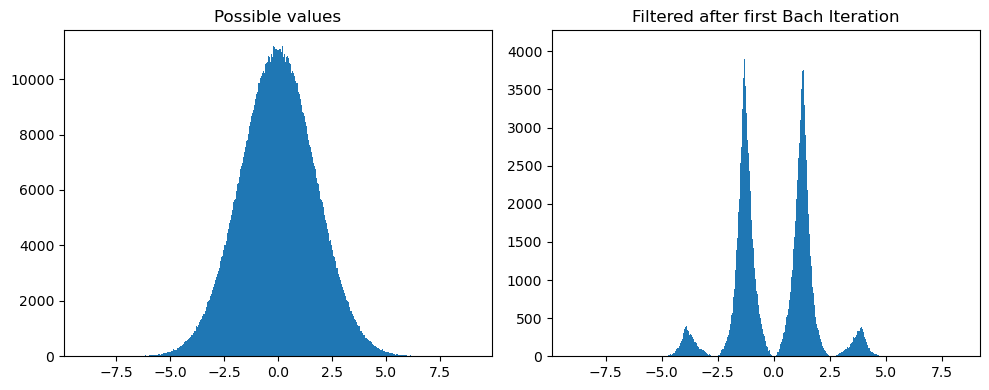

In [10]:
# Plot the results

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(lincombs_values, bins=1000)
ax[0].set_title("Possible values")
ax[1].hist(optimal_combinations_raw, bins=1000)
ax[1].set_title("Filtered after first Bach Iteration")

plt.tight_layout()
plt.show()

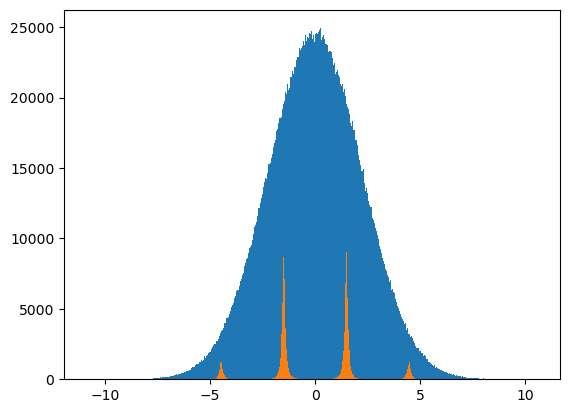

In [46]:
# Plot them together

plt.hist(lincombs_values, bins=1000)
plt.hist(optimal_combinations_raw, bins=1000)

plt.show()

As we can see, the normal distributed shape wont be likely be stripped from the original distribution

Quantized values:  [1 4 3 ... 3 2 2]


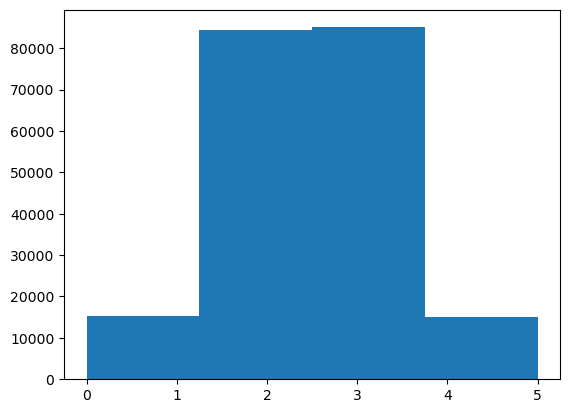

In [47]:
# Quantize the values here based on the m bit quantiizer


# Quantize the values here based on the m bit quantizer
quantized_values = np.digitize(optimal_combinations_raw, bins=bounds, right=True)
print("Quantized values: ", quantized_values)

plt.hist(quantized_values, bins=4)

plt.show()

Quanzizing the values intially with a 0-iterated BACH distribtuion results in a heavily unevenly distributed quantization, where values are not uniformly distributed